In [1]:
import numpy as np
import matplotlib.pyplot as plt
from arc import *  # Import ARC (Alkali Rydberg Calculator)

# documentation can be found here: https://arc-alkali-rydberg-calculator.readthedocs.io/en/latest/generated/arc.alkali_atom_data.Hydrogen.html

In [2]:
# define a function which convert eV into nm
def eV_to_nm(x):
  y = (1239.84198)/x
  return y

3.5
1.4546206284700003
852.3473101739875


Text(0.5, 1.0, '6P3/2')

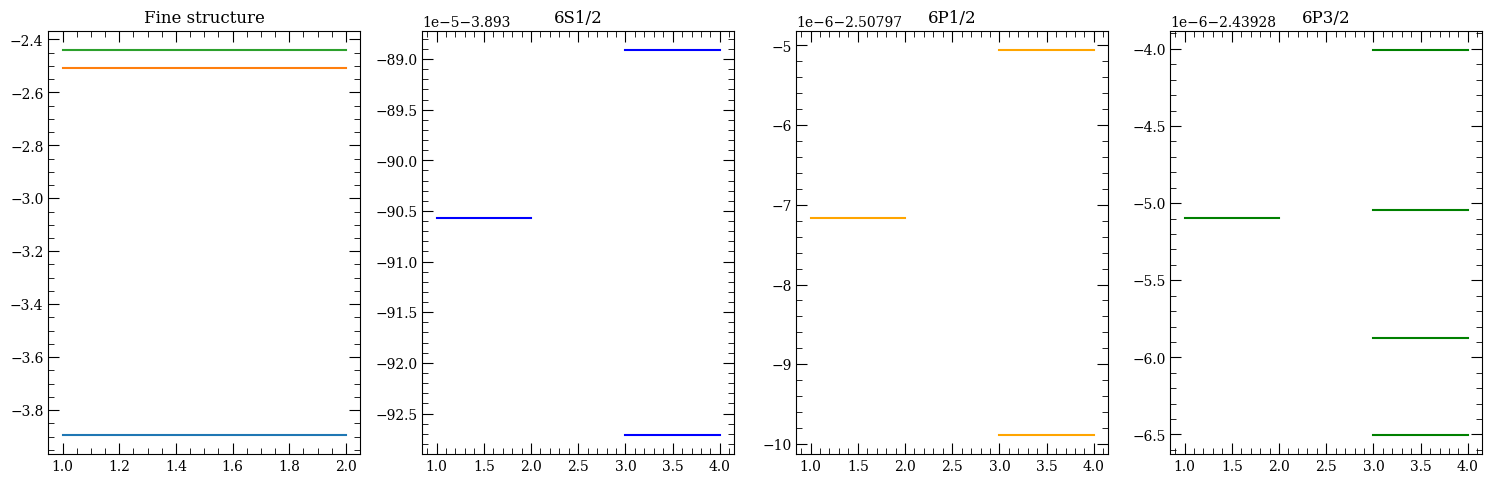

In [72]:
# Load parameters for Caesium
atom = Caesium()

nmin = 6  # Minimum n
nmax = 6  # Maximum n
lmin = 0  # Minimum l
lmax = 1  # Maxmium l

# return nuclear spin of Cs
print(atom.I)

# return energy of hyperfine spin state of Cs in eV - atom.getEnergy(n,l,j,s)

# For n=6 , l=0 => (J=1/2, F = 3,4 )
# For n=6 , l=1 => (J=1/2, F = 3,4 ) and (J=3/2, F = 2,3,4,5)

print( atom.getEnergy(6,1,1.5) - atom.getEnergy(6,0,0.5) )
print( eV_to_nm( atom.getEnergy(6,1,1.5) - atom.getEnergy(6,0,0.5) ))

# get the hyperfine structure coupling coefficient for each line
Coeff_ground    = atom.getHFSCoefficients(6,0,0.5)
Coeff_D1        = atom.getHFSCoefficients(6,1,0.5)
Coeff_D2        = atom.getHFSCoefficients(6,1,1.5)


# From the HPS coefficient, evaluation of the hypefine split for each line:
 # AlkaliAtom.getHFSEnergyShift( J , F , A , B , by default s=0.5 for alkalis)

E_hfs_ground       = np.empty(2, dtype=float) 
E_hfs_ground[0]    = atom.getHFSEnergyShift( 0.5, 3, Coeff_ground[0], Coeff_ground[1] )
E_hfs_ground[1]    = atom.getHFSEnergyShift( 0.5, 4, Coeff_ground[0], Coeff_ground[1] )

E_hfs_D1           = np.empty(2, dtype=float) 
E_hfs_D1[0]        = atom.getHFSEnergyShift( 0.5, 3, Coeff_D1[0], Coeff_D1[1] )
E_hfs_D1[1]        = atom.getHFSEnergyShift( 0.5, 4, Coeff_D1[0], Coeff_D1[1] )

E_hfs_D2           = np.empty(4, dtype=float) 
E_hfs_D2[0]        = atom.getHFSEnergyShift( 1.5, 2, Coeff_D2[0], Coeff_D2[1] )
E_hfs_D2[1]        = atom.getHFSEnergyShift( 1.5, 3, Coeff_D2[0], Coeff_D2[1] )
E_hfs_D2[2]        = atom.getHFSEnergyShift( 1.5, 4, Coeff_D2[0], Coeff_D2[1] )
E_hfs_D2[3]        = atom.getHFSEnergyShift( 1.5, 5, Coeff_D2[0], Coeff_D2[1] )


fig, axs = plt.subplots(1, 4)
fig.set_size_inches(18.5, 5.5)
# plot energy lines of fine structure
axs[0].plot([1,2], [atom.getEnergy(6,0,0.5),atom.getEnergy(6,0,0.5)], label = "line 1")
axs[0].plot([1,2], [atom.getEnergy(6,1,0.5),atom.getEnergy(6,1,0.5)], label = "line 2")
axs[0].plot([1,2], [atom.getEnergy(6,1,1.5),atom.getEnergy(6,1,1.5)], label = "line 2")
axs[0].set_title('Fine structure')

# plot energy lines of hyperfine structure
axs[1].plot([1,2], [atom.getEnergy(6,0,0.5),atom.getEnergy(6,0,0.5)] , label = "line 1", color='blue')
axs[1].plot([3,4], [atom.getEnergy(6,0,0.5),atom.getEnergy(6,0,0.5)] + Hz_to_ev(E_hfs_ground[0]), label = "line 1", color='blue')
axs[1].plot([3,4], [atom.getEnergy(6,0,0.5),atom.getEnergy(6,0,0.5)] + Hz_to_ev(E_hfs_ground[1]), label = "line 1", color='blue')
axs[1].set_title('6S1/2')

# plot energy lines of hyperfine structure
axs[2].plot([1,2], [atom.getEnergy(6,1,0.5),atom.getEnergy(6,1,0.5)] , label = "line 1", color='orange')
axs[2].plot([3,4], [atom.getEnergy(6,1,0.5),atom.getEnergy(6,1,0.5)] + Hz_to_ev(E_hfs_D1[0]), label = "line 1", color='orange')
axs[2].plot([3,4], [atom.getEnergy(6,1,0.5),atom.getEnergy(6,1,0.5)] + Hz_to_ev(E_hfs_D1[1]), label = "line 1", color='orange')
axs[2].set_title('6P1/2')

# plot energy lines of hyperfine structure
axs[3].plot([1,2], [atom.getEnergy(6,1,1.5),atom.getEnergy(6,1,1.5)] , label = "line 1", color='green')
axs[3].plot([3,4], [atom.getEnergy(6,1,1.5),atom.getEnergy(6,1,1.5)] + Hz_to_ev(E_hfs_D2[0]), label = "line 1", color='green')
axs[3].plot([3,4], [atom.getEnergy(6,1,1.5),atom.getEnergy(6,1,1.5)] + Hz_to_ev(E_hfs_D2[1]), label = "line 1", color='green')
axs[3].plot([3,4], [atom.getEnergy(6,1,1.5),atom.getEnergy(6,1,1.5)] + Hz_to_ev(E_hfs_D2[2]), label = "line 1", color='green')
axs[3].plot([3,4], [atom.getEnergy(6,1,1.5),atom.getEnergy(6,1,1.5)] + Hz_to_ev(E_hfs_D2[3]), label = "line 1", color='green')
axs[3].set_title('6P3/2')

# Plot Energy Levels of Cesium
#levels = LevelPlot(atom)
#levels.makeLevels(nmin, nmax, lmin, lmax)
#levels.drawLevels()
#levels.showPlot()



In [169]:
from tabulate import tabulate

# dipole matrix element for hyperfine transition getDipoleMatrixElementHFStoFS(n1, l1, j1, f1, mf1, n2, l2, j2, mj2, q, s=0.5)
# principal quantum numbers n1 , n2. We will take = 6 in our case
#  orbital moment l1 , l2.  We will take = 0 or 1 in our case.
# q (int) – specifies transition that the driving field couples to, +1, 0 or -1 corresponding to polarization state sigma+ , pi or sigma-


# For n=6 , l=0 => (J=1/2, F = 3,4 )
# For n=6 , l=1 => (J=1/2, F = 3,4 ) and (J=3/2, F = 2,3,4,5)

#AlkaliAtom.getSphericalMatrixElementHFStoFS(j1, f1, mf1, j2, mj2, q)

# Cesium D2 line
F = 3
F_ =3
j1 = 0.5
j2 = 1.5
mf1 = 0
mf2 = 1
q = 1
#for mf in range(-4, -4, 1)
#print(atom.getSphericalMatrixElementHFStoFS(j1, F , mf1 , j2, -j2+2 , q))

q1 = (-1.0) ** (F + j1 + 1.0 + atom.I)* ((2.0 * F + 1) * (2 * j2 + 1)) ** 0.5* Wigner6j(j2 ,j1, 1 ,  F, F_, atom.I) 
print( q1 )
q2 = (-1) ** (F - 1 + mf1) * Wigner3j(F, 1, F_ , mf2, -q, -mf1)
print( q2)
print(q1*q2)
#print((-1) ** (F - mf1) * Wigner3j(F, 1, F_, -mf1, -q, mf2))

table = [["","mF=-4", "mF=-3","mF=-2","mF=-1","mF=0","mF=1","mF=2","mF=3","mF=4"],
["F'=2",0,1,2,3,np.sqrt(1/14),6,7,8,9],
["F'=3",0,1,2,3,np.sqrt(3/16),6,7,8,9],
["F'=4",0,1,2,3,np.sqrt(25/336),6,7,8,9],
]

print(tabulate(table))

0.8660254037844386
0.26726124191242434
0.23145502494313783
----  -----  -----  -----  -----  -------------------  ----  ----  ----  ----
      mF=-4  mF=-3  mF=-2  mF=-1  mF=0                 mF=1  mF=2  mF=3  mF=4
F'=2  0      1      2      3      0.2672612419124244   6     7     8     9
F'=3  0      1      2      3      0.4330127018922193   6     7     8     9
F'=4  0      1      2      3      0.27277236279499045  6     7     8     9
----  -----  -----  -----  -----  -------------------  ----  ----  ----  ----
